### Titanic Survival Prediction: A Classification Example

In [28]:
from fastai import * 
from fastai.tabular.all import *

In [29]:
import pandas as pd

In [30]:
df = pd.read_csv("/Users/vivekraj/Documents/Programming/PGDDS/datasets/titanic_data.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [31]:
data = df.drop(['Name','PassengerId','Ticket','Cabin'], axis = 1)

In [32]:
data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
import seaborn as sns

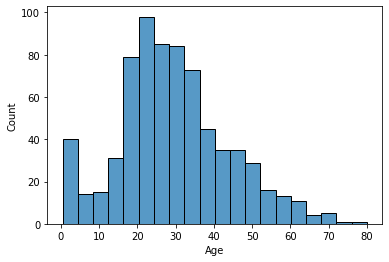

In [37]:
sns.histplot(data['Age']);

In [38]:
data['Survived'] = data['Survived'].astype('category')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    object  
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 49.8+ KB


In [50]:
 data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: category
Categories (2, int64): [0, 1]

In [51]:
cat_names = ['Pclass','SibSp','Embarked','Parch','Sex']
cont_names = ['Fare','Age']

In [56]:
dls = TabularDataLoaders.from_df(data, y_names='Survived', cat_names = cat_names, cont_names=cont_names,
procs=[Categorify,FillMissing,Normalize],y_block=CategoryBlock)

In [57]:
dls.show_batch()

,Pclass,SibSp,Embarked,Parch,Sex,Age_na,Fare,Age,Survived
0,2,1,S,0,female,False,26.000000,19.000000,1
1,3,0,S,0,male,False,8.662500,42.000000,0
2,3,0,C,0,male,False,7.229200,28.500000,0
3,3,3,S,1,male,False,21.075001,1.999999,0
4,1,0,C,2,male,False,113.275004,57.999999,0
5,3,1,S,0,female,False,9.825000,21.000000,0
6,3,2,S,0,male,False,7.925001,28.000000,0
7,3,0,S,0,male,False,7.125001,17.000000,0
8,3,0,S,0,female,False,7.854200,14.000001,0
9,3,0,C,0,male,False,7.224999,40.000000,0


In [60]:
learn = tabular_learner(dls,metrics=accuracy)

In [61]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.691127,0.689354,0.561798,00:00
1,0.613823,0.663573,0.640449,00:00
2,0.546396,0.630727,0.691011,00:00
3,0.504136,0.608934,0.696629,00:00
4,0.472243,0.575201,0.758427,00:00
5,0.451050,0.512721,0.797753,00:00
6,0.436424,0.464392,0.780899,00:00
7,0.421083,0.438447,0.797753,00:00
8,0.410404,0.425068,0.797753,00:00
9,0.403318,0.422311,0.786517,00:00


In [62]:
learn.show_results()

In [63]:
row, clas, probs = learn.predict(data.iloc[0])

In [64]:
row.show()

,Pclass,SibSp,Embarked,Parch,Sex,Age_na,Fare,Age,Survived
0,3,1,S,0,male,False,7.250001,22.0,0


In [65]:
clas,probs

(tensor(0), tensor([0.8314, 0.1686]))

In [66]:
test_df = df.copy()
test_df.drop(['Survived'],axis=1, inplace=True)
dl = learn.dls.test_dl(test_df)

In [67]:
learn.get_preds(dl=dl)

In [71]:
pred_df = learn.show_results()

In [72]:
plt.plot(pred_df['Survived'],pred_df['Survived_pred'])

TypeError: 'NoneType' object is not subscriptable

In [73]:
# Defining the function to plot the ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    sns.lineplot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    sns.lineplot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
draw_roc()